Import packages.

In [659]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import urllib.request, json 

Grab data from GitHub and save locally.

gravel followers

In [660]:
with urllib.request.urlopen("https://raw.githubusercontent.com/aliceafriedman/Data620/master/mikegravel_followers.json") as url:
    gravel = json.loads(url.read().decode())
    #print(gravel)
with open('C:/MSDS/Python/Twitter620/gravel.txt', 'w') as outfile:
    json.dump(gravel,outfile)

clementine followers

In [661]:
with urllib.request.urlopen("https://raw.githubusercontent.com/aliceafriedman/Data620/master/mslizclementine_followers.json") as url:
    clementine = json.loads(url.read().decode())
with open('C:/MSDS/Python/Twitter620/clementine.txt', 'w') as outfile:
    json.dump(clementine,outfile)

tankcat followers

In [662]:
with urllib.request.urlopen("https://raw.githubusercontent.com/aliceafriedman/Data620/master/tankcat_followers.json") as url:
    tankcat = json.loads(url.read().decode())
with open('C:/MSDS/Python/Twitter620/tankcat.txt', 'w') as outfile:
    json.dump(tankcat,outfile)

Clean the data.

In [663]:
gravel_d = pd.read_json('C:/MSDS/Python/Twitter620/gravel.txt',orient='records')

gravel_d['source'] = 'gravel'

gravel_d['screen_name'] = gravel_d['screen_name'].str.lower()

print(gravel_d)


          screen_name  verified  followers_count  source
0       potionsellers     False               57  gravel
1         reno_dak0ta     False                5  gravel
2       jwilleymich25     False               26  gravel
3        boricualiano     False                5  gravel
4             jimbube     False              727  gravel
5      marcobattaglia     False              785  gravel
6             potkas2     False               40  gravel
7      cthagodsonreal     False                6  gravel
8            hnerdpod     False                4  gravel
9          ssemddoong     False                1  gravel
10             xunnzi     False               14  gravel
11          tjvirbick     False              127  gravel
12         itisbenign     False               28  gravel
13       deebledabble     False              263  gravel
14          grebsling     False                4  gravel
15        adammandelj     False              209  gravel
16         agent_mheb     False

In [664]:
clementine_d = pd.read_json('C:/MSDS/Python/Twitter620/clementine.txt',orient='records')

clementine_d['source'] = 'clementine'

clementine_d['screen_name'] = clementine_d['screen_name'].str.lower()

print(clementine_d)

     screen_name  verified  followers_count      source
0  richardangwin     False           168195  clementine
1    jamswithjay     False               23  clementine
2     mattharney     False              314  clementine
3    reddirtmike     False              402  clementine
4   thewelshokie     False               25  clementine


In [665]:
tankcat_d = pd.read_json('C:/MSDS/Python/Twitter620/tankcat.txt',orient='records')

tankcat_d['source'] = 'tankcat'

tankcat_d['screen_name'] = tankcat_d['screen_name'].str.lower()

print(tankcat_d)

        screen_name  verified  followers_count   source
0          jdawsey1      True           201430  tankcat
1         coryross_     False              795  tankcat
2      sagebrushsam     False              131  tankcat
3   americanhomocon     False             3460  tankcat
4   angelin64309017     False               19  tankcat
5       tioselfrabi     False                0  tankcat
6       roy35740628     False              105  tankcat
7   isportsanalysis     False             5457  tankcat
8        garear1234     False               21  tankcat
9            nfpstl     False               44  tankcat
10  garkavenkoele12     False                4  tankcat
11  jackier76937483     False               79  tankcat
12     nouriapalade     False                8  tankcat
13      chiefscards     False               37  tankcat
14          mluethy     False             1110  tankcat
15      caseycarols     False              441  tankcat
16    tarrancegroup     False               29  

In [666]:
#concatenate data frames
frames = [gravel_d, clementine_d, tankcat_d]
master = pd.concat(frames)

#deduplicate, keeping the record containing the largest follower count
from pandas import DataFrame
dedup = pd.DataFrame(master)
dedup.sort_values(by=['screen_name','followers_count'], ascending=[True,False], inplace = True) 
dedup.drop_duplicates(subset="screen_name", keep='first', inplace = True)
print(dedup)

          screen_name  verified  followers_count      source
99          _jeff__h_     False               44      gravel
95          abby_rees     False               50      gravel
30        abigail1963     False             4272      gravel
848     acttogetherfl     False             2381      gravel
15        adammandelj     False              209      gravel
153      adomgetachew     False             2654      gravel
144         adryan336     False              183      gravel
16         agent_mheb     False               61      gravel
193       ajcharvez11     False              138      gravel
98          ajdeffen3     False                6      gravel
152         ajfeather     False             1542      gravel
163           aks2013     False              152      gravel
171    alanalolitanyc     False               52      gravel
991          aleemjan     False              107      gravel
100     alexdimattesa     False              109      gravel
57       alizabara000   

In [667]:
#calculate the log of the follower count to compress the scale, masking those records with value of 0.
mask = (dedup['followers_count'] != 0)
dedup_valid = dedup[mask]

dedup['log_fc'] = 0
dedup.loc[mask, 'log_fc'] = np.log(dedup_valid['followers_count'])

In [668]:
#remove those with fewer than 5 followers
master1=dedup.loc[dedup['followers_count'] > 5]

#sort before reindexing
master1 = master1.sort_values(by=['followers_count'])

master1.reset_index(inplace=True)

#delete extra obselete index of each separate dataframe
del master1['index']

print(master1)

         screen_name  verified  followers_count      source  log_fc
0     cthagodsonreal     False                6      gravel       2
1          ajdeffen3     False                6      gravel       2
2           cwitschy     False                8      gravel       2
3        trashbirdxx     False                8      gravel       2
4          mcannon64     False                8     tankcat       2
5     michaeltweaton     False                8      gravel       2
6       nouriapalade     False                8     tankcat       2
7          calilukas     False                9      gravel       2
8           lekgatan     False                9      gravel       2
9    paradiddleplaya     False                9      gravel       2
10        benallenuy     False               12      gravel       2
11        dogaozesmi     False               13      gravel       3
12       sofiaponte0     False               13      gravel       3
13            xunnzi     False               14 

In [669]:
#check for connectivity; clementine is missing
answer = master1.loc[(master1['screen_name'] == "clementine") | (master1['screen_name'] == "tankcat") |
                     (master1['screen_name'] == "gravel")]

print(answer)

    screen_name  verified  followers_count  source  log_fc
203     tankcat      True             5183  gravel       9


Plot

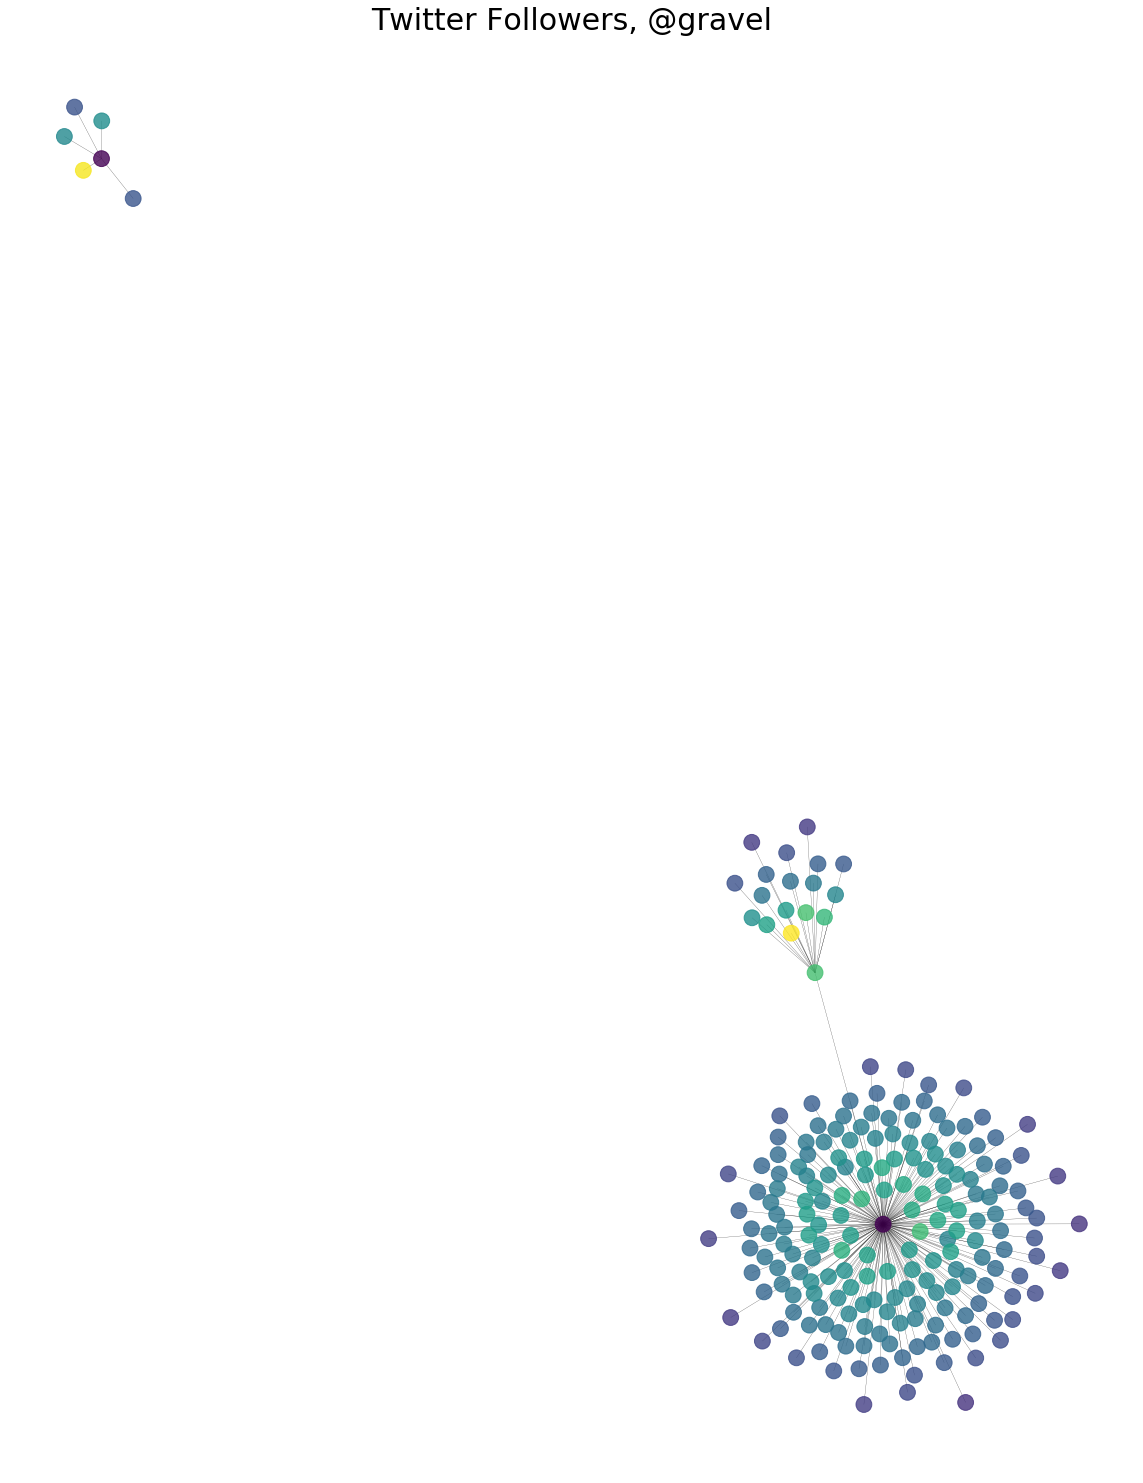

In [670]:
#read graph frpmo data frame
G=nx.from_pandas_edgelist(master1, 'source', 'screen_name', ['followers_count', 'verified', 'log_fc'])

#set node attributes use within plot
nx.set_node_attributes(G, pd.Series(master1.followers_count.values, index=master1.screen_name).to_dict(), 'followers_count')
nx.set_node_attributes(G, pd.Series(master1.verified.values, index=master1.screen_name).to_dict(), 'verified')
nx.set_node_attributes(G, pd.Series(master1.log_fc.values, index=master1.screen_name).to_dict(), 'log_fc')

degree=G.degree()
nodes=G.nodes()

#n_color will set color of nodes to degree; each degree in this network is 1.
n_color=np.asarray([degree[n] for n in nodes])

#follow will set the node_color to the log of the follower count for each user.
follow = np.asarray([G.nodes(data='log_fc', default=0)[n] for n in nodes])

#there are very few verified followers; 'verify' may be used as node_color to highlight them.
verify = np.asarray([G.nodes(data='verified', default=0)[n] for n in nodes])

#fix node positioning within spring_layout
fixed_nodes = [n for n in G.nodes()]

#stop the deprecated message generated by Matplotlib
import warnings
from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

#make the figure larger
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111,aspect = 'equal')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#set parameters for the layout
pos = nx.spring_layout(G,weight='log_fc',pos=pos,fixed=fixed_nodes,k = 0.05)

#plot
nx.draw(G,
        pos,
        node_color=follow,
        with_labels = False, 
        node_size=250,
        edge_color='black', 
        font_size= 12,
        font_color='black',
        cmap='viridis',
        width=.25,
        alpha = .8)

#nx.draw_networkx_edge_labels(G, pos)
plt.title('Twitter Followers, @gravel',fontsize=30)
plt.show()


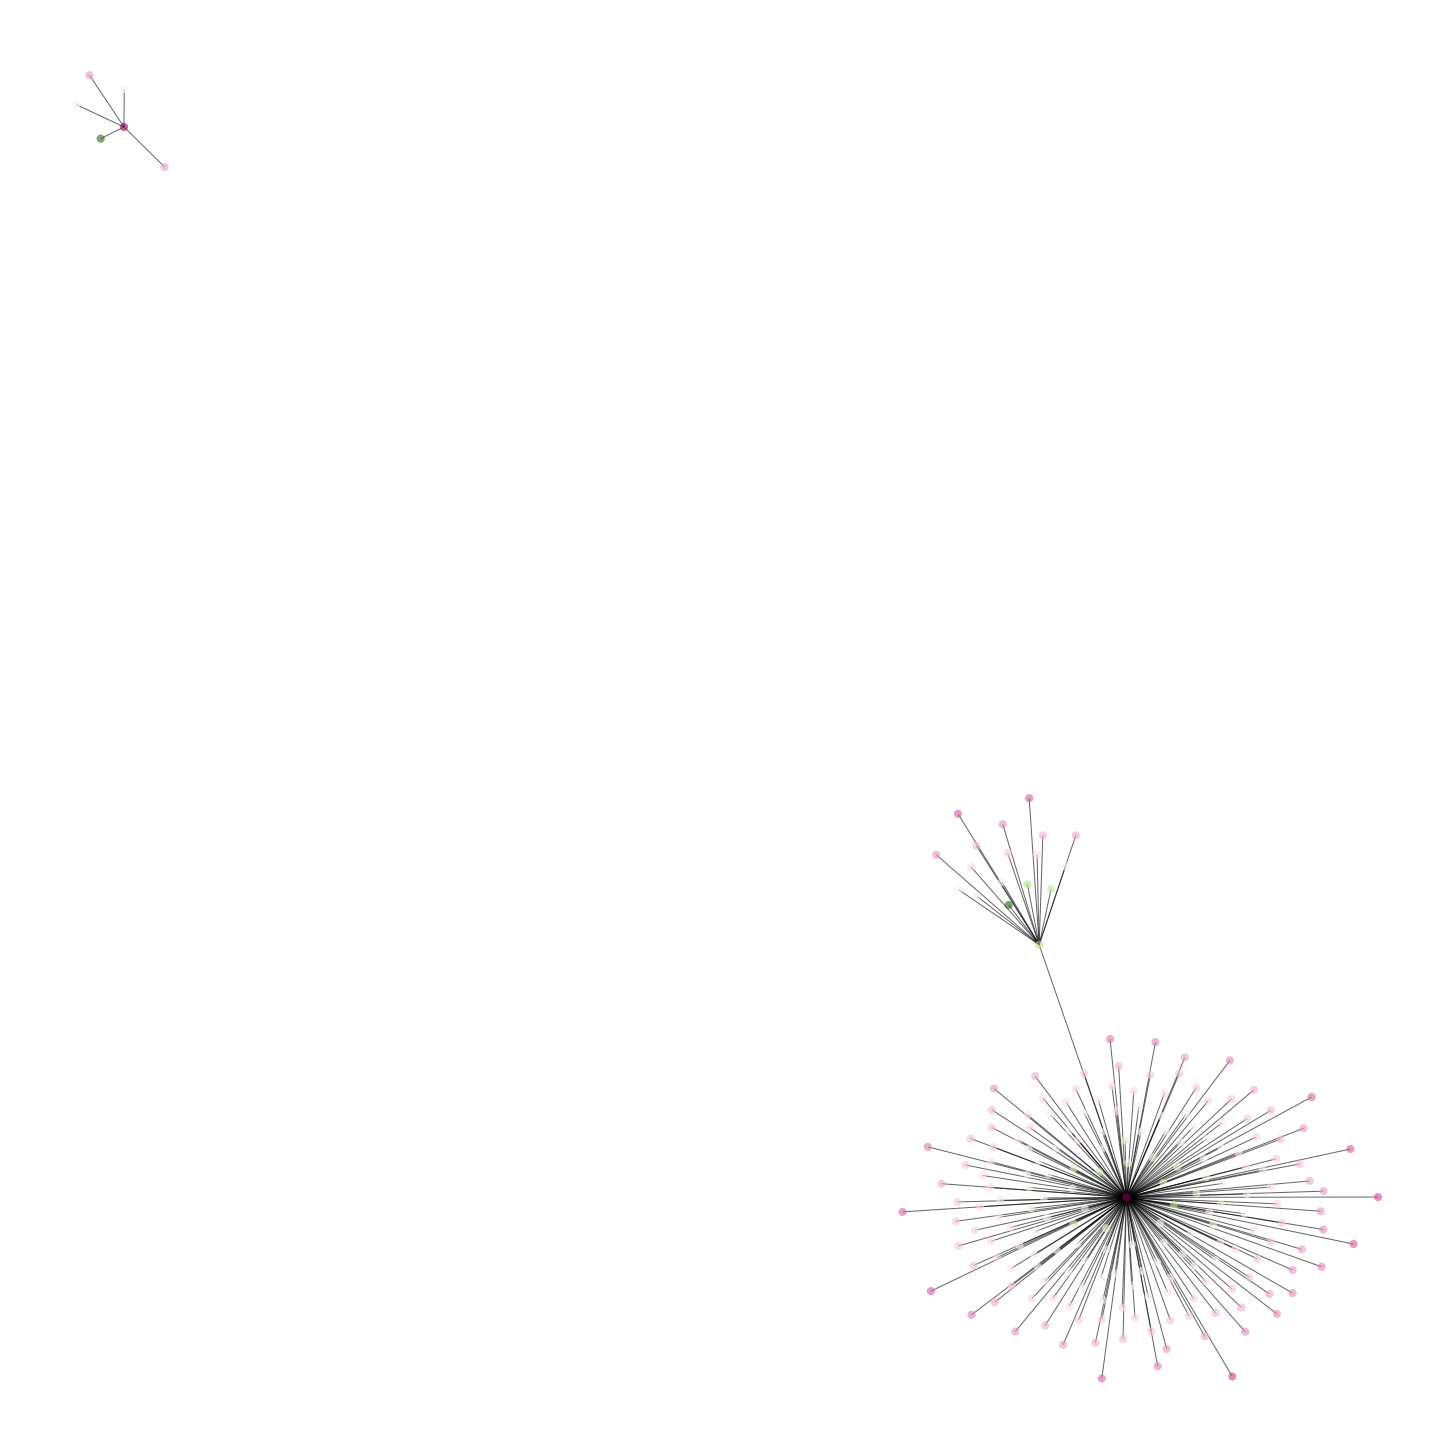

In [671]:

#different plot
plt.figure(figsize = (20,20))
nx.draw(G, pos=pos, node_color=follow, cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
plt.savefig('graphfinal.png')
plt.show()

Resources:
https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
https://python-graph-gallery.com/324-map-a-color-to-network-nodes/
https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf
https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5
https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Interaction%20Network.ipynb